In [3]:
import os
import sys
import numpy as np
import seaborn as sns
from tqdm import tqdm
sys.path.append('../scripts')
from ChangePointDetector import ChangePointDetector

In [4]:
best_settings = lambda a : np.unravel_index(a.argmax(), a.shape)

In [5]:
data_path = os.path.join('..','data', 'Langevin_1D.txt')
truth_path = os.path.join('..','data', 'Langevin_1D_change_points.txt')
detector = ChangePointDetector()
detector.set_data(data_path)
detector.set_truth(truth_path)

In [6]:
quantile_floor = 78
quantile_ceiling = 98
quantile_step = 2
quantile_count = int((quantile_ceiling - quantile_floor) / quantile_step)
window_floor = 150
window_ceiling = 300
window_step = 15
window_count = int((window_ceiling - window_floor) / window_step)
wasserstein_recall_matrix = np.empty((window_count, quantile_count))
wasserstein_f1_matrix = np.empty((window_count, quantile_count))
kolmogorov_recall_matrix = np.empty((window_count, quantile_count))
kolmogorov_f1_matrix = np.empty((window_count, quantile_count))
denoised_wasserstein_recall_matrix = np.empty((window_count, quantile_count))
denoised_wasserstein_f1_matrix = np.empty((window_count, quantile_count))
denoised_kolmogorov_recall_matrix = np.empty((window_count, quantile_count))
denoised_kolmogorov_f1_matrix = np.empty((window_count, quantile_count))
window_count, quantile_count

(10, 10)

In [7]:
score_directory_path = os.path.join('..', 'data', 'f1-score-computations')
wasserstein_f1_path = os.path.join(score_directory_path, 'wasserstein_f1_scores.npy')
wasserstein_recall_path = os.path.join(score_directory_path, 'wasserstein_recall_scores.npy')
if os.path.exists(wasserstein_f1_path) and os.path.exists(wasserstein_recall_path):
   wasserstein_f1_matrix = np.load(wasserstein_f1_path) 
   wasserstein_recall_matrix = np.load(wasserstein_recall_path) 
else:
    method='wasserstein'
    for i, q in tqdm(enumerate(range(quantile_floor, quantile_ceiling, quantile_step))):
        for j, w in tqdm(enumerate(range(window_floor, window_ceiling, window_step))):
            detector.compute_change_points(method=method, windowsize=w, cutoff=(0.01 * q))
            detector.compute_f1_stats()
            wasserstein_recall_matrix[i,j] = detector.get_f1_stats()[0]
            wasserstein_f1_matrix[i,j] = detector.get_f1_stats()[2]
    np.save(wasserstein_f1_path, wasserstein_f1_matrix)
    np.save(wasserstein_recall_path, wasserstein_recall_matrix)


In [8]:
kolmogorov_f1_path = os.path.join(score_directory_path, 'kolmogorov_f1_scores.npy')
kolmogorov_recall_path = os.path.join(score_directory_path, 'kolmogorov_recall_scores.npy')
if os.path.exists(kolmogorov_f1_path) and os.path.exists(kolmogorov_recall_path):
   kolmogorov_f1_matrix = np.load(kolmogorov_f1_path) 
   kolmogorov_recall_matrix = np.load(kolmogorov_recall_path) 
else:
    method='kolmogorov'
    for i, q in tqdm(enumerate(range(quantile_floor, quantile_ceiling, quantile_step))):
        for j, w in tqdm(enumerate(range(window_floor, window_ceiling, window_step))):
            detector.compute_change_points(method=method, windowsize=w, cutoff=(0.01 * q))
            detector.compute_f1_stats()
            kolmogorov_recall_matrix[i,j] = detector.get_f1_stats()[0]
            kolmogorov_f1_matrix[i,j] = detector.get_f1_stats()[2]
    np.save(kolmogorov_f1_path, kolmogorov_f1_matrix)
    np.save(kolmogorov_recall_path, kolmogorov_recall_matrix)

In [9]:
detector.denoise_data(50)

50
50
99900


In [10]:
denoised_kolmogorov_f1_path = os.path.join(score_directory_path, 'denoised_kolmogorov_f1_scores.npy')
denoised_kolmogorov_recall_path = os.path.join(score_directory_path, 'denoised_kolmogorov_recall_scores.npy')
if os.path.exists(denoised_kolmogorov_f1_path) and os.path.exists(denoised_kolmogorov_recall_path):
   denoised_kolmogorov_f1_matrix = np.load(denoised_kolmogorov_f1_path) 
   denoised_kolmogorov_recall_matrix = np.load(denoised_kolmogorov_recall_path) 
else:
    method='kolmogorov'
    for i, q in tqdm(enumerate(range(quantile_floor, quantile_ceiling, quantile_step))):
        for j, w in tqdm(enumerate(range(window_floor, window_ceiling, window_step))):
            detector.compute_change_points(method=method, windowsize=w, cutoff=(0.01 * q))
            detector.compute_f1_stats()
            denoised_kolmogorov_recall_matrix[i,j] = detector.get_f1_stats()[0]
            denoised_kolmogorov_f1_matrix[i,j] = detector.get_f1_stats()[2]
    np.save(denoised_kolmogorov_f1_path, denoised_kolmogorov_f1_matrix)
    np.save(denoised_kolmogorov_recall_path, denoised_kolmogorov_recall_matrix)

In [11]:
denoised_wasserstein_f1_path = os.path.join(score_directory_path, 'denoised_wasserstein_f1_scores.npy')
denoised_wasserstein_recall_path = os.path.join(score_directory_path, 'denoised_wasserstein_recall_scores.npy')
if os.path.exists(denoised_wasserstein_f1_path) and os.path.exists(denoised_wasserstein_recall_path):
   denoised_wasserstein_f1_matrix = np.load(denoised_wasserstein_f1_path) 
   denoised_wasserstein_recall_matrix = np.load(denoised_wasserstein_recall_path) 
else:
    method='wasserstein'
    for i, q in tqdm(enumerate(range(quantile_floor, quantile_ceiling, quantile_step))):
        for j, w in tqdm(enumerate(range(window_floor, window_ceiling, window_step))):
            detector.compute_change_points(method=method, windowsize=w, cutoff=(0.01 * q))
            detector.compute_f1_stats()
            denoised_wasserstein_recall_matrix[i,j] = detector.get_f1_stats()[0]
            denoised_wasserstein_f1_matrix[i,j] = detector.get_f1_sstats()[2]
    np.save(denoised_wasserstein_f1_path, denoised_wasserstein_f1_matrix)
    np.save(denoised_wasserstein_recall_path, denoised_wasserstein_recall_matrix)
    


In [12]:
opt_f1_wasserstein_params = best_settings(wasserstein_f1_matrix)
opt_f1_kolmogorov_params = best_settings(kolmogorov_f1_matrix)
opt_f1_denoised_wasserstein_params = best_settings(denoised_wasserstein_f1_matrix)
opt_f1_denoised_kolmogorov_params = best_settings(denoised_kolmogorov_f1_matrix)
opt_recall_wasserstein_params = best_settings(wasserstein_recall_matrix)
opt_recall_kolmogorov_params = best_settings(kolmogorov_recall_matrix)
opt_recall_denoised_wasserstein_params = best_settings(denoised_wasserstein_recall_matrix)
opt_recall_denoised_kolmogorov_params = best_settings(denoised_kolmogorov_recall_matrix)

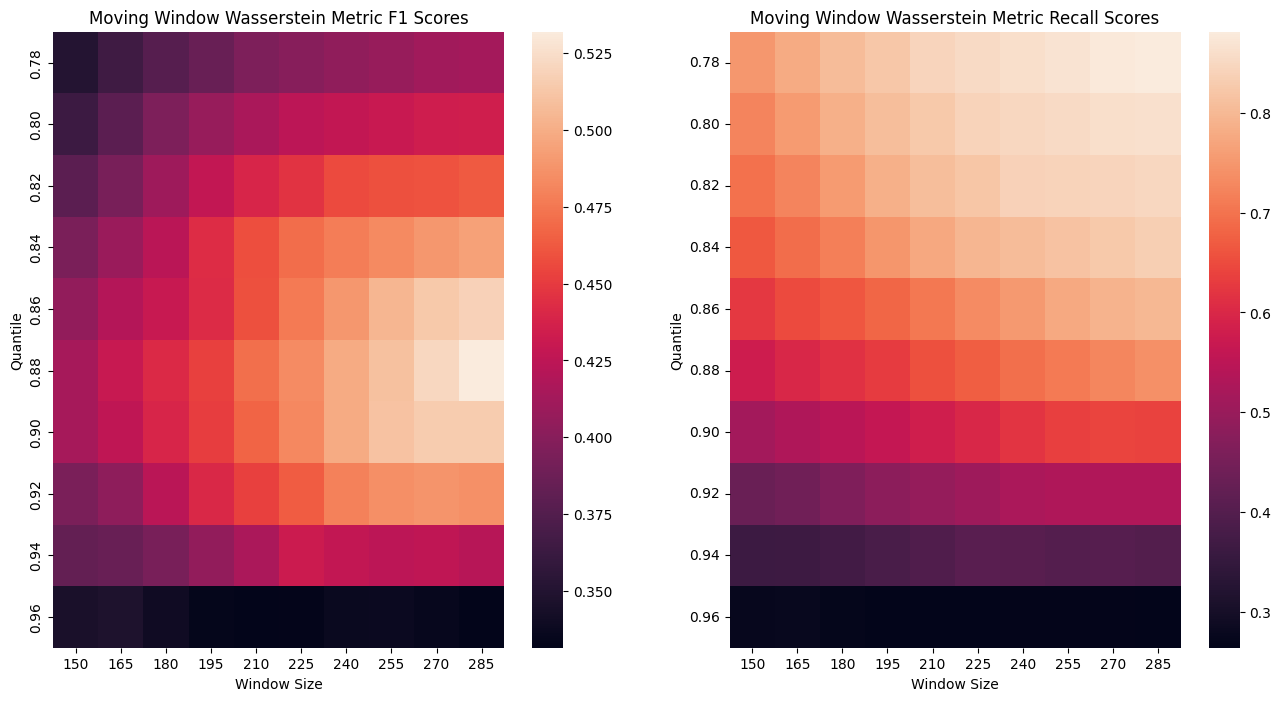

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2)  = plt.subplots(1,2)
fig.set_size_inches((16,8))
sns.heatmap(wasserstein_f1_matrix, ax=ax1)
sns.heatmap(wasserstein_recall_matrix, ax=ax2)
ax1.set_title("Moving Window Wasserstein Metric F1 Scores")
ax1.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax1.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax1.set_ylabel("Quantile")
ax1.set_xlabel("Window Size")
ax2.set_title("Moving Window Wasserstein Metric Recall Scores")
ax2.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax2.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax2.set_ylabel("Quantile")
ax2.set_xlabel("Window Size")
plt.yticks(rotation=0)
plt.savefig('../img/wasserstein-f1-recall-heatmaps.png', dpi=1000)

<Figure size 640x480 with 0 Axes>

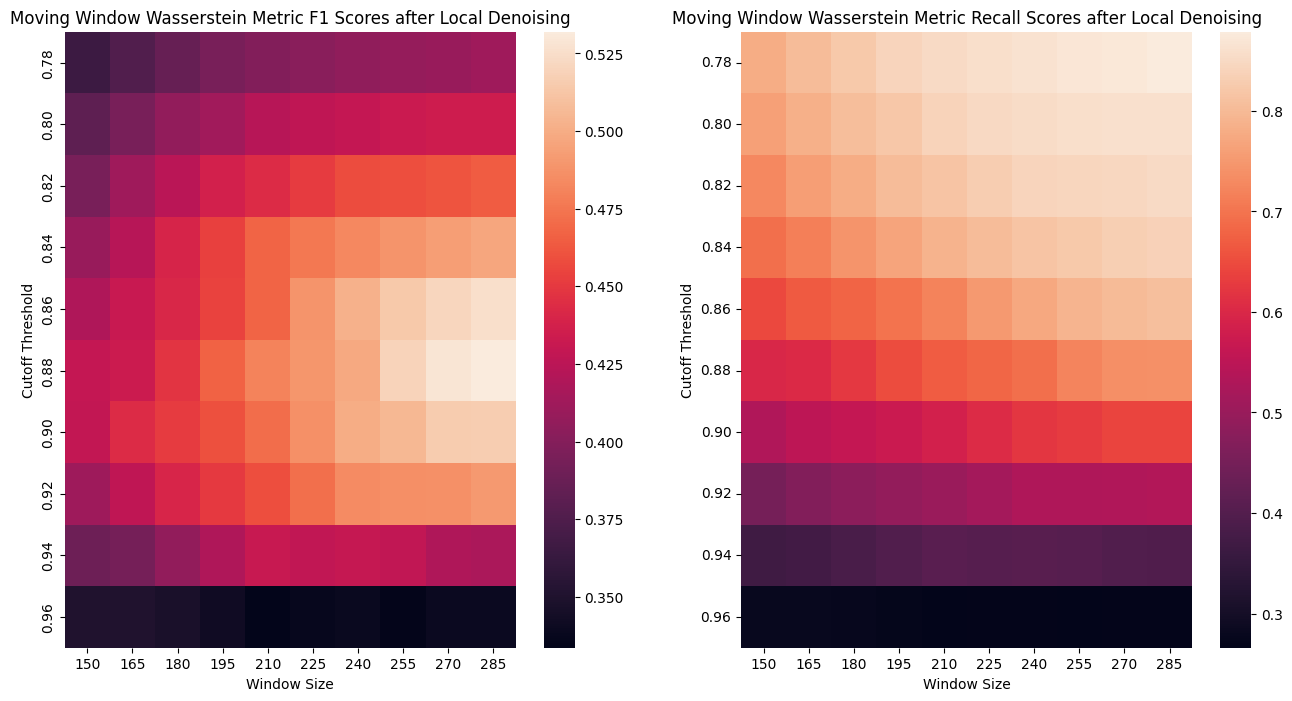

In [11]:
plt.clf()
fig, (ax1, ax2)  = plt.subplots(1,2)
fig.set_size_inches((16,8))
sns.heatmap(denoised_wasserstein_f1_matrix, ax=ax1)
sns.heatmap(denoised_wasserstein_recall_matrix, ax=ax2)
ax1.set_title("Moving Window Wasserstein Metric F1 Scores after Local Denoising")
ax2.set_title("Moving Window Wasserstein Metric Recall Scores after Local Denoising")
ax1.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax1.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax1.set_ylabel("Cutoff Threshold")
ax1.set_xlabel("Window Size")
ax2.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax2.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax2.set_ylabel("Cutoff Threshold")
ax2.set_xlabel("Window Size")
plt.yticks(rotation=0)
plt.savefig('../img/wasserstein-plus-denoising-f1-recall-heatmaps.png', dpi=1000)

<Figure size 640x480 with 0 Axes>

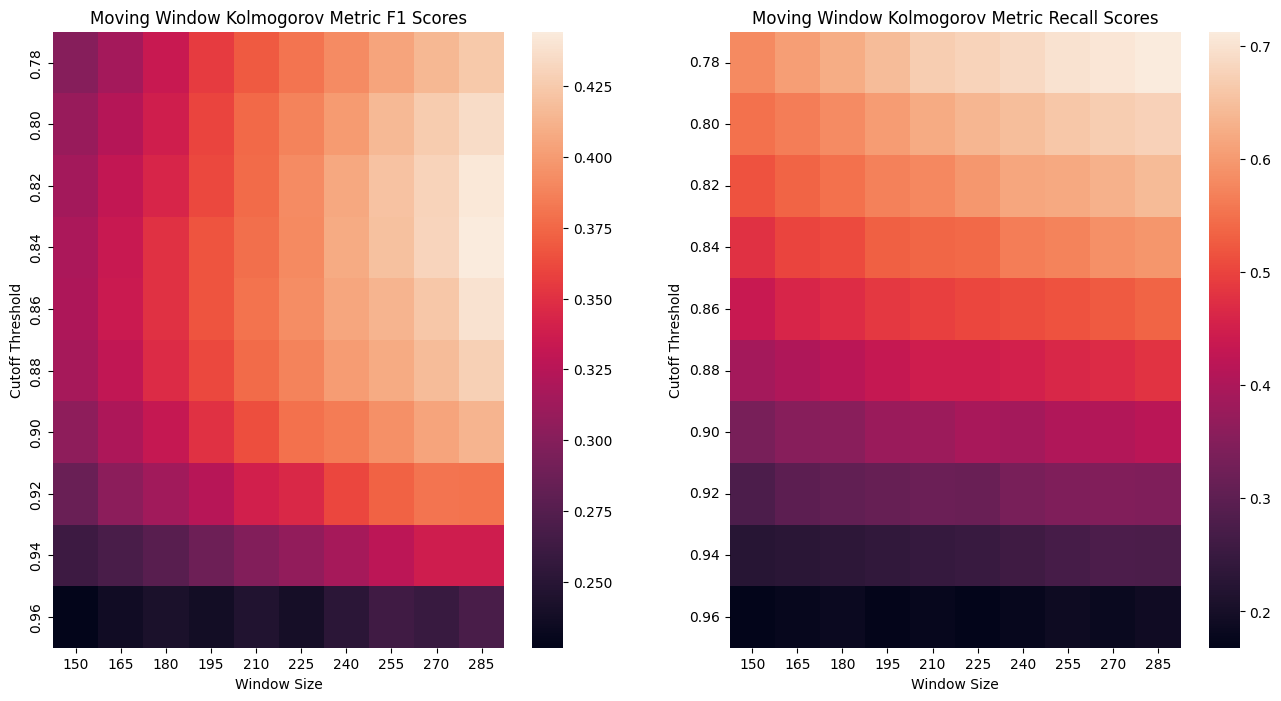

In [28]:
plt.clf()
fig, (ax1, ax2)  = plt.subplots(1,2)
fig.set_size_inches((16,8))
sns.heatmap(kolmogorov_f1_matrix, ax=ax1)
sns.heatmap(kolmogorov_recall_matrix, ax=ax2)
ax1.set_title("Moving Window Kolmogorov Metric F1 Scores")
ax1.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax1.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax1.set_ylabel("Cutoff Threshold")
ax1.set_xlabel("Window Size")
ax2.set_title("Moving Window Kolmogorov Metric Recall Scores")
ax2.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax2.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax2.set_ylabel("Cutoff Threshold")
ax2.set_xlabel("Window Size")
plt.yticks(rotation=0)
plt.savefig('../img/kolmogorov-f1-recall-heatmaps.png', dpi=1000)

<Figure size 640x480 with 0 Axes>

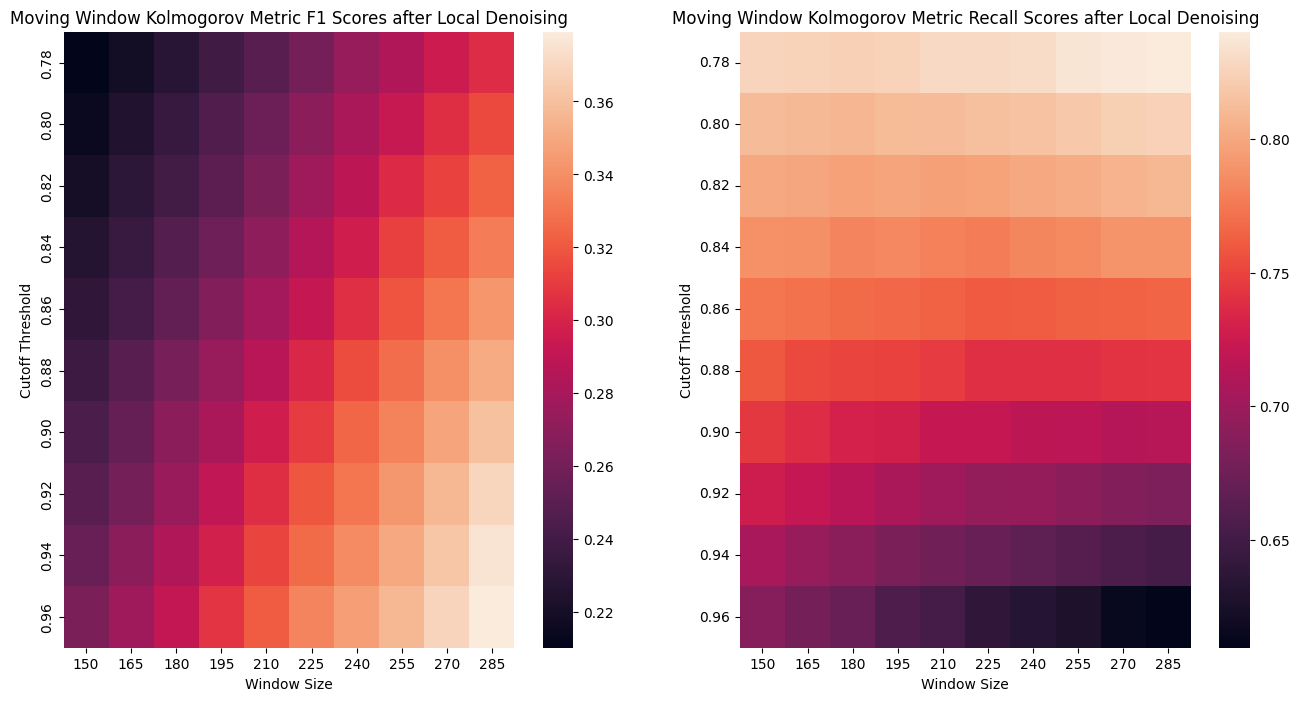

In [27]:
plt.clf()
fig, (ax1, ax2)  = plt.subplots(1,2)
fig.set_size_inches((16,8))
sns.heatmap(denoised_kolmogorov_f1_matrix, ax=ax1)
sns.heatmap(denoised_kolmogorov_recall_matrix, ax=ax2)
ax1.set_title("Moving Window Kolmogorov Metric F1 Scores after Local Denoising")
ax2.set_title("Moving Window Kolmogorov Metric Recall Scores after Local Denoising")
ax1.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax1.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax1.set_ylabel("Cutoff Threshold")
ax1.set_xlabel("Window Size")
ax2.set_yticklabels([f"{0.01 * q:.2f}" for q in range(quantile_floor, quantile_ceiling, quantile_step)])
ax2.set_xticklabels([f"{w}" for w in range(window_floor, window_ceiling, window_step)])
ax2.set_ylabel("Cutoff Threshold")
ax2.set_xlabel("Window Size")
plt.yticks(rotation=0)
plt.savefig('../img/kolmogorov-plus-denoising-f1-recall-heatmaps.png', dpi=1000)